Importing libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Import dataset

In [64]:
df = pd.read_csv('./data/Nutritional_Programming_West.csv')

Drop hashed columns

In [65]:
hashed_col = [
    'Surname', 'First Given Name', 'Birth Date (YYMMDD)', 'Month of Birth',
    'Day of Birth', 'Social Insurance Number', 'Provincial Health Insurance Number',
    'Home Address', 'Home Address Postal Code', 'emailaddress1_DC', 'mir_primary_phone_DC',
    'Full Name_AC', 'Client Preferred Name_AC', 'Client Supervisor Name_AC', 'Client Address Line 2_AC',
    'Client Email_AC', 'Client Phone (Main)_AC', 'Client Phone (Other)_AC', 'SADDR2_YD', 'Member Name_YD',
    'License Plate Number_YD', 'Property Code_YD', 'MemberFN_YD', 'MemberLN_YD', 'C_Prefername_HB',
    'C_Unit_HB', 'C_mPhoneType_ID_HB', 'C_mPhone_HB', 'C_sPhoneType_ID_HB', 'C_sPhone_HB', 'C_email_HB',
    'hbaddress_HB', 'e_FirstName_HB', 'e_LastName_HB', 'e_Phone_HB', 'e_email_HB', 'RG_Location_HB',
    'UpdateBy_HB', 'Associated Contact_CC', 'Location_CC', 'Current Service Location_CC', 'ClientName_CU',
    'Phone_CU'
]

df.drop(columns=hashed_col, axis=1, inplace=True, errors='ignore') # axis=1 refers to columns

In [66]:
df.head()

,Unique Record ID,Sex,Marital Status,Year of Birth,Birth Province / Country Code,Home Province Code,Creation Date,Last Modified,System Registration,statecode_DC,...,WithdrawalDate_CU,ReasonForWithdrawal_CU,Citizenship_CU,Primary Diagnosis_CU,MODIFIEDON_TR,ClientAddressCity_TR,Citizenship_TR,Program Name_TR,DischargeDateY-M-D_TR,Encounter Status_TR
0,9036 CCU,Cisgender Woman,Single,1963,NaN,NaN,7/20/2015,NaN,Piourette,NaN,...,2/5/2018,Deceased,Canadian Citizen,Gastrointestinal,NaN,NaN,NaN,NaN,NaN,NaN
1,9038 CCU,Cisgender Woman,Single,1958,NaN,NaN,10/23/2021,NaN,Piourette,NaN,...,10/23/2021,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm...",NaN,NaN,NaN,NaN,NaN,NaN
2,9038 CCU,Cisgender Woman,Single,1958,NaN,NaN,10/23/2021,NaN,Piourette,NaN,...,10/23/2021,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm...",NaN,NaN,NaN,NaN,NaN,NaN
3,9038 CCU,Cisgender Woman,Single,1958,NaN,NaN,3/18/2015,NaN,Piourette,NaN,...,3/18/2015,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm...",NaN,NaN,NaN,NaN,NaN,NaN
4,9038 CCU,Cisgender Woman,Single,1958,NaN,NaN,3/18/2015,NaN,Piourette,NaN,...,3/18/2015,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm...",NaN,NaN,NaN,NaN,NaN,NaN


Drop columns where all values are NaN

In [67]:
df.dropna(axis=1, how='all', inplace=True)

In [68]:
df.head()

,Unique Record ID,Sex,Marital Status,Year of Birth,Creation Date,System Registration,System_CU,ClientID_CU,City_CU,Program_CU,Race_CU,Culture_CU,Religion_CU,PreferredLanguage_CU,WithdrawalDate_CU,ReasonForWithdrawal_CU,Citizenship_CU,Primary Diagnosis_CU
0,9036 CCU,Cisgender Woman,Single,1963,7/20/2015,Piourette,CCU,9036,Toronto,Nutritional Programming - West,Caucasian,Canadian,None Selected,English,2/5/2018,Deceased,Canadian Citizen,Gastrointestinal
1,9038 CCU,Cisgender Woman,Single,1958,10/23/2021,Piourette,CCU,9038,NaN,Nutritional Programming - West,Caucasian,European,Christian,English,10/23/2021,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm..."
2,9038 CCU,Cisgender Woman,Single,1958,10/23/2021,Piourette,CCU,9038,NaN,Nutritional Programming - West,Caucasian,European,Christian,English,10/23/2021,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm..."
3,9038 CCU,Cisgender Woman,Single,1958,3/18/2015,Piourette,CCU,9038,NaN,Nutritional Programming - West,Caucasian,European,Christian,English,3/18/2015,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm..."
4,9038 CCU,Cisgender Woman,Single,1958,3/18/2015,Piourette,CCU,9038,NaN,Nutritional Programming - West,Caucasian,European,Christian,English,3/18/2015,None Selected,Landed Immigrant,"Hepatitis A, B,or C. please specify under comm..."


In [69]:
print(df.columns)

Index(['Unique Record ID', 'Sex', 'Marital Status', 'Year of Birth',
       'Creation Date', 'System Registration', 'System_CU', 'ClientID_CU',
       'City_CU', 'Program_CU', 'Race_CU', 'Culture_CU', 'Religion_CU',
       'PreferredLanguage_CU', 'WithdrawalDate_CU', 'ReasonForWithdrawal_CU',
       'Citizenship_CU', 'Primary Diagnosis_CU'],
      dtype='object')


Group by gender and marital status

In [70]:
grouped_sex_marital = df.groupby(['Marital Status', 'Sex']).size().reset_index(name='Count')
print(grouped_sex_marital)

  Marital Status              Sex  Count
0     Common Law  Cisgender Woman      1
1       Divorced    Cisgender Man      4
2       Divorced  Cisgender Woman      1
3        Married    Cisgender Man      2
4  None Selected    Cisgender Man      1
5  None Selected  Cisgender Woman     11
6         Single    Cisgender Man     26
7         Single  Cisgender Woman     24
8        Unknown    Cisgender Man      4
9        Unknown  Cisgender Woman     16


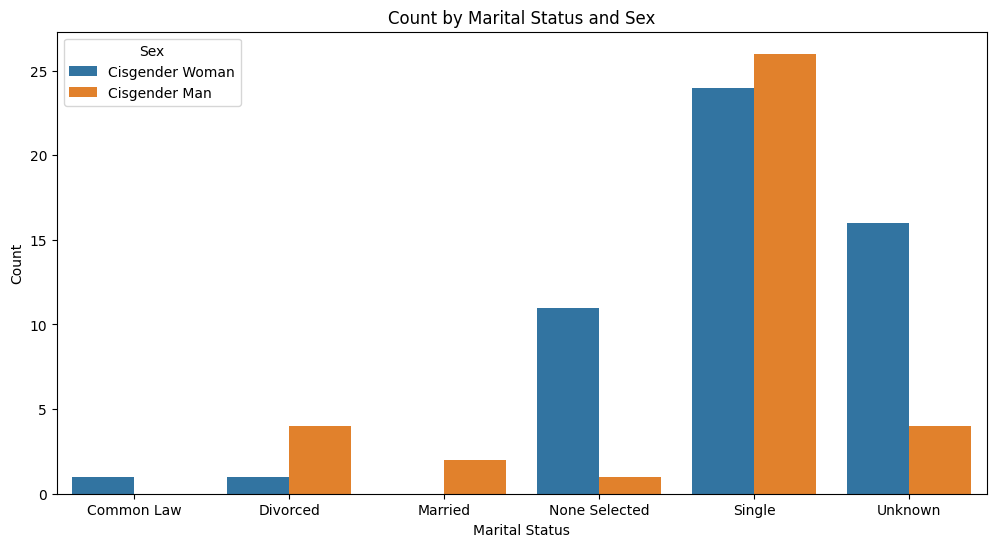

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital Status', y='Count', hue='Sex', data=grouped_sex_marital)
plt.title('Count by Marital Status and Sex')
plt.show()

Group by gender and culture

In [72]:
grouped_sex_culture = df.groupby(['Culture_CU', 'Sex']).size().reset_index(name='Count')
print(grouped_sex_culture)

                  Culture_CU              Sex  Count
0   Aboriginal/First Nations  Cisgender Woman      1
1                    African    Cisgender Man      2
2                   Canadian    Cisgender Man     30
3                   Canadian  Cisgender Woman     24
4                  Caribbean  Cisgender Woman      4
5                 East Asian    Cisgender Man      1
6                 East Asian  Cisgender Woman      1
7                   European    Cisgender Man      3
8                   European  Cisgender Woman      7
9   Preferred not to Specify  Cisgender Woman      3
10                   Unknown    Cisgender Man      1
11                   Unknown  Cisgender Woman     13


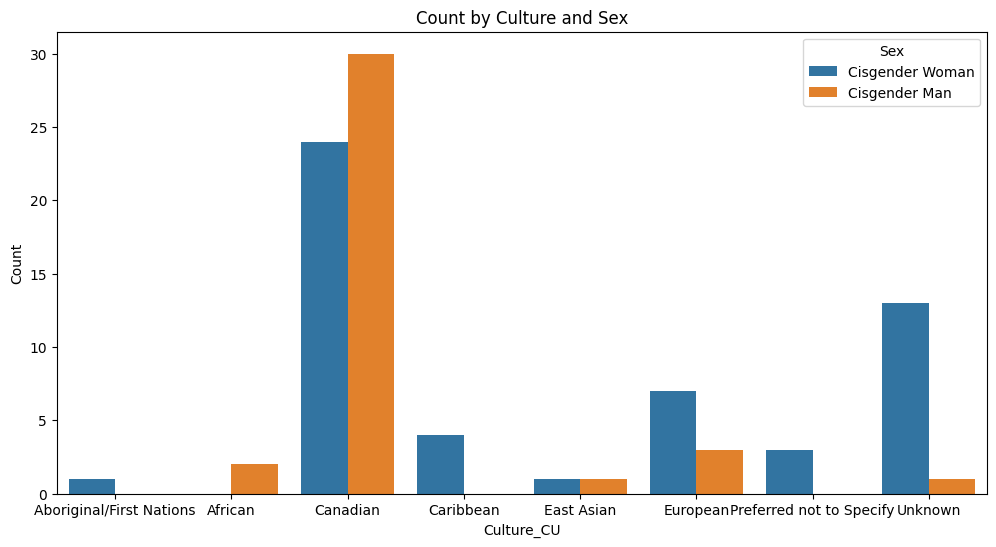

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Culture_CU', y='Count', hue='Sex', data=grouped_sex_culture)
plt.title('Count by Culture and Sex')
plt.show()

Group by gender and citizenship

In [74]:
grouped_sex_citizen = df.groupby(['Citizenship_CU', 'Sex']).size().reset_index(name='Count')
print(grouped_sex_citizen)

     Citizenship_CU              Sex  Count
0  Canadian Citizen    Cisgender Man     37
1  Canadian Citizen  Cisgender Woman     43
2  Landed Immigrant  Cisgender Woman      7
3     None Selected  Cisgender Woman      3


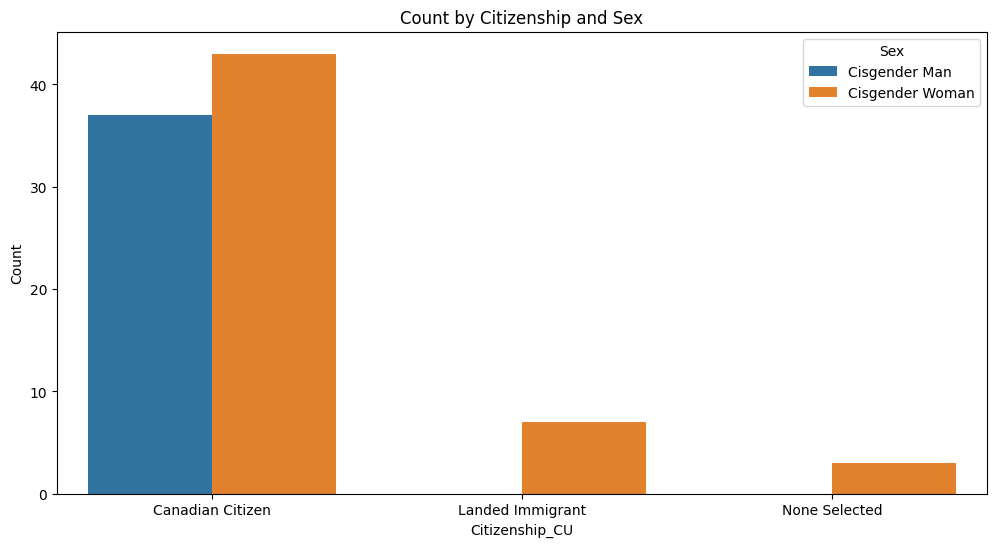

In [75]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Citizenship_CU', y='Count', hue='Sex', data=grouped_sex_citizen)
plt.title('Count by Citizenship and Sex')
plt.show()